# Terrain Motion Displacement - Wiltshire Outside 10cm (Scaled - Exhaustive)

## 1) IPython Setup

In [1]:
%%javascript
/* 
 * Force prevention of output scroll toggle.
 * Original source: https://github.com/ipython/ipython/issues/2172#issuecomment-53708976 
 */
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
%load_ext ipycache
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 8)

# We have to add a reference to the parent folder in order to access the modules.
import sys,os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import main as templ
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tse.tse_matchmethod import tse_match_methods
from tse.tse_matchtype import TSEMatchType
from tse.tse_datautils import TSEDataUtils

## 2) Calculate Displacement 

In [3]:
%%cache -d cache/ cache_path_outside_10cm_scaled_exhaustive.pkl results_dict

config_file = "../../eval_data/calib/calibdata_23_03_15_11_07_04.txt"

image_pairs = [
                ("../../eval_data/motion_images/path_10cm/IMG1.JPG", "../../eval_data/motion_images/path_10cm/IMG2.JPG"),
                ("../../eval_data/motion_images/path_10cm/IMG3.JPG", "../../eval_data/motion_images/path_10cm/IMG4.JPG"),
                ("../../eval_data/motion_images/path_10cm/IMG5.JPG", "../../eval_data/motion_images/path_10cm/IMG6.JPG"),
                ("../../eval_data/motion_images/path_10cm/IMG7.JPG", "../../eval_data/motion_images/path_10cm/IMG8.JPG"),
                ("../../eval_data/motion_images/path_10cm/IMG9.JPG", "../../eval_data/motion_images/path_10cm/IMG10.JPG"),
                ("../../eval_data/motion_images/path_10cm/IMG11.JPG", "../../eval_data/motion_images/path_10cm/IMG12.JPG"),
                ("../../eval_data/motion_images/path_10cm/IMG11.JPG", "../../eval_data/motion_images/path_10cm/IMG12.JPG")
              ]

patch_sizes = [50, 100, 200]

match_method1 = TSEMatchType("DistanceEuclidean", tse_match_methods.DISTANCE_ED, None, "r", reverse_score=True)
match_method2 = TSEMatchType("HistCorrel", tse_match_methods.HIST, cv2.cv.CV_COMP_CORREL, "b")
match_method3 = TSEMatchType("HistChiSqr", tse_match_methods.HIST, cv2.cv.CV_COMP_CHISQR, "g", reverse_score=True)
match_method4 = TSEMatchType("DistanceCorr", tse_match_methods.DISTANCE, cv2.cv.CV_TM_CCORR_NORMED, "y")

match_methods = [match_method1, match_method2, match_method3, match_method4]

results_dict = templ.start_tests(image_pairs, patch_sizes, match_methods, config_file, exhaustive_search=True, use_scaling=True, plot_results=False)

[Saved variables results_dict to file '/Users/connorgoddard/Desktop/CS39440-major-project/src/template_matching_scaling/notebooks/cache/cache_path_outside_10cm_scaled_exhaustive.pkl'.]


## 3) Tests

### Test 1: IMG1/IMG2 - 50px patch - *DistanceEuclidean*, *DistanceCorr*, *HistCorrel*, *HistChiSqr*

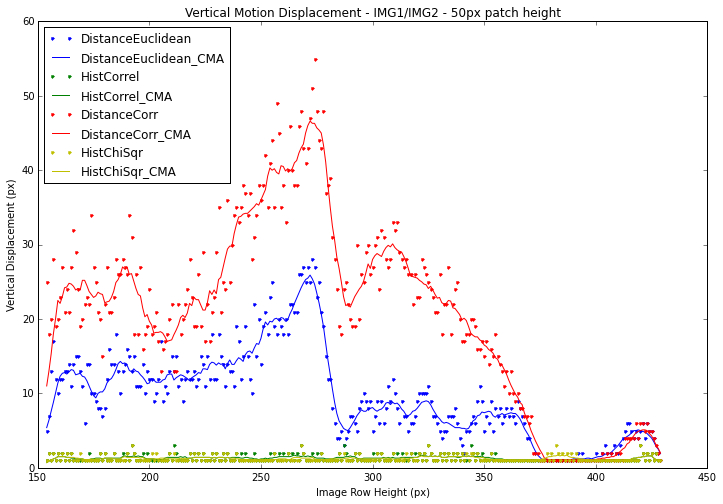

In [4]:
results_pair1_50 = results_dict['IMG1.JPG_IMG2.JPG'][50]

final_results = {}
format_ids = ["b", "g", "r", "y"]

for method in results_pair1_50:
        
    if method not in final_results:
        final_results[method] = {}

    data = results_pair1_50[method]

    final_results[method]['displacement'] = [o.displacement for o in data]

    final_results[method]['row'] = [o.row for o in data]
    
    
for i, result in enumerate(final_results):
    
    final_results[result]['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(final_results[result]['displacement']), 10)
    
    plt.plot(np.array(final_results[result]['row']), np.array(final_results[result]['displacement']), "{0}.".format(format_ids[i]), label=result)
    
    plt.plot(final_results[result]['row'][len(final_results[result]['row']) - len(final_results[result]['cma']):], final_results[result]['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))                                                 

plt.title('Vertical Motion Displacement - IMG1/IMG2 - 50px patch height')
plt.xlabel('Image Row Height (px)')
plt.ylabel('Vertical Displacement (px)')
plt.legend(loc='upper left')
plt.show()

### Test 2: IMG1/IMG2 - 100px patch - *DistanceEuclidean*, *DistanceCorr*, *HistCorrel*, *HistChiSqr*

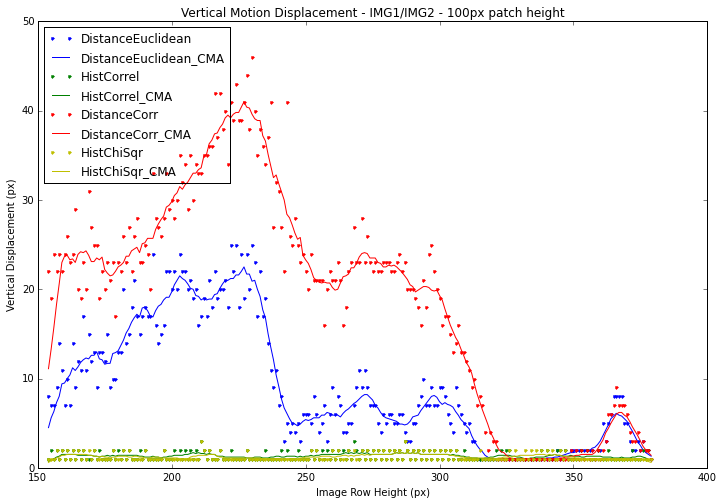

In [5]:
results_pair1_100 = results_dict['IMG1.JPG_IMG2.JPG'][100]

final_results = {}
format_ids = ["b", "g", "r", "y"]

for method in results_pair1_100:
        
    if method not in final_results:
        final_results[method] = {}

    data = results_pair1_100[method]

    final_results[method]['displacement'] = [o.displacement for o in data]

    final_results[method]['row'] = [o.row for o in data]
    
    
for i, result in enumerate(final_results):
    
    final_results[result]['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(final_results[result]['displacement']), 10)
    
    plt.plot(np.array(final_results[result]['row']), np.array(final_results[result]['displacement']), "{0}.".format(format_ids[i]), label=result)
    
    plt.plot(final_results[result]['row'][len(final_results[result]['row']) - len(final_results[result]['cma']):], final_results[result]['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))                                                 

plt.title('Vertical Motion Displacement - IMG1/IMG2 - 100px patch height')
plt.xlabel('Image Row Height (px)')
plt.ylabel('Vertical Displacement (px)')
plt.legend(loc='upper left')
plt.show()

### Test 3: IMG1/IMG2 - 200px patch - *DistanceEuclidean, DistanceCorr, HistCorrel, HistChiSqr*

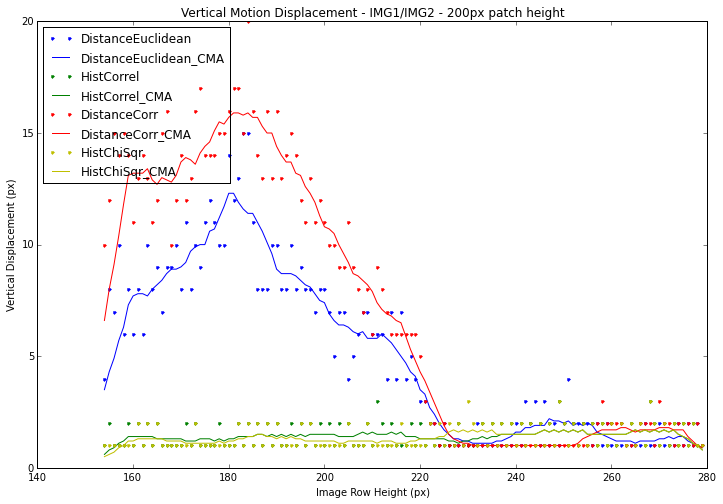

In [6]:
results_pair1_200 = results_dict['IMG1.JPG_IMG2.JPG'][200]

final_results = {}
format_ids = ["b", "g", "r", "y"]

for method in results_pair1_200:
        
    if method not in final_results:
        final_results[method] = {}

    data = results_pair1_200[method]

    final_results[method]['displacement'] = [o.displacement for o in data]

    final_results[method]['row'] = [o.row for o in data]
    
    
for i, result in enumerate(final_results):
    
    final_results[result]['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(final_results[result]['displacement']), 10)
    
    plt.plot(np.array(final_results[result]['row']), np.array(final_results[result]['displacement']), "{0}.".format(format_ids[i]), label=result)
    
    plt.plot(final_results[result]['row'][len(final_results[result]['row']) - len(final_results[result]['cma']):], final_results[result]['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))                                            

plt.title('Vertical Motion Displacement - IMG1/IMG2 - 200px patch height')
plt.xlabel('Image Row Height (px)')
plt.ylabel('Vertical Displacement (px)')
plt.legend(loc='upper left')
plt.show()

### Test 4: IMG1/IMG2 - 100px, 200px patch - *DistanceEuclidean*

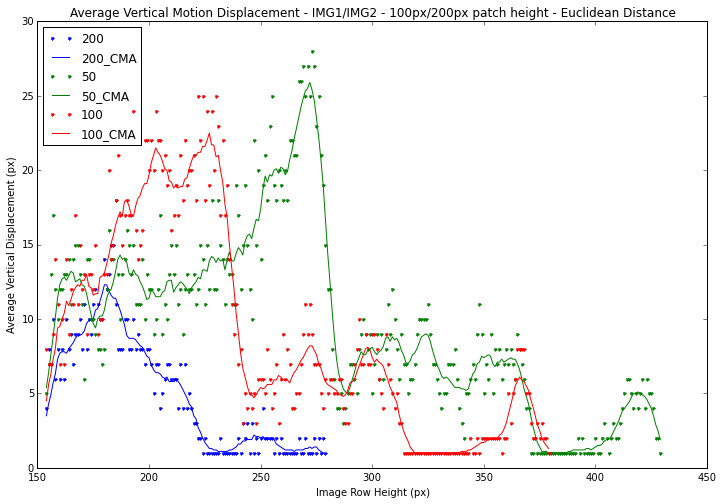

In [7]:
results_pair1 = results_dict['IMG1.JPG_IMG2.JPG']

raw_results_pair1_100_200 = []
image_rows = []

final_results = {}
format_ids = ["b", "g", "r", "y"]

for patch in results_pair1:
        
    if patch not in final_results:
        final_results[patch] = {}
        final_results[patch]['DistanceEuclidean'] = {}

    data = results_pair1[patch]['DistanceEuclidean']

    final_results[patch]['DistanceEuclidean']['displacement'] = [o.displacement for o in data]

    final_results[patch]['DistanceEuclidean']['row'] = [o.row for o in data]
    
for i, result in enumerate(final_results):
    
    current_patch_data_euclidean = final_results[result]['DistanceEuclidean']
    current_patch_data_euclidean['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(current_patch_data_euclidean['displacement']), 10)
    
    plt.plot(np.array(current_patch_data_euclidean['row']), np.array(current_patch_data_euclidean['displacement']), "{0}.".format(format_ids[i]), label=result)
    
    plt.plot(current_patch_data_euclidean['row'][len(current_patch_data_euclidean['row']) - len(current_patch_data_euclidean['cma']):], current_patch_data_euclidean['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))   

plt.title('Average Vertical Motion Displacement - IMG1/IMG2 - 100px/200px patch height - Euclidean Distance')
plt.xlabel('Image Row Height (px)')
plt.ylabel('Average Vertical Displacement (px)')
plt.legend(loc='upper left')

plt.show()

### Test 5: IMG1 - IMG12 - 50px patch - *DistanceEuclidean, DistanceCorr, HistCorrel, HistChiSqr*

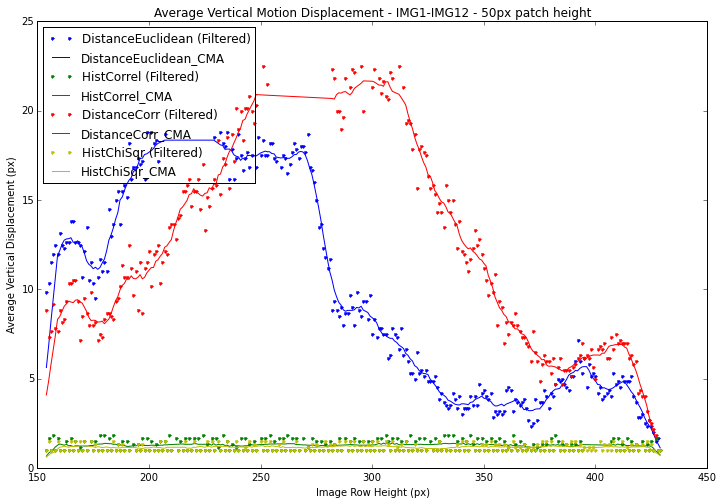

In [8]:
results = results_dict

final_results = {}

format_ids = ["b", "g", "r", "y"]

for image_pair in results:
    
    for method in results[image_pair][50]:
        
        if method not in final_results:
            final_results[method] = {}
        
        data = results[image_pair][50][method]
        
        if 'displacement' in final_results[method]:
            final_results[method]['displacement'].append([o.displacement for o in data])
        else:
            final_results[method]['displacement'] = [[o.displacement for o in data]]
            
        final_results[method]['row'] = [o.row for o in data]
        

for i, result in enumerate(final_results):
    
    final_results[result]['average'] = TSEDataUtils.calc_element_wise_average(final_results[result]['displacement'])
    
    final_results[result]['filtered'] = TSEDataUtils.filter_outliers_ab_dist_median(final_results[result]['average'])
    
    final_results[result]['filtered_row'] = np.array(final_results[result]['row'])[TSEDataUtils.filter_outliers_ab_dist_median_indices(final_results[result]['average'])]
    
    final_results[result]['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(final_results[result]['filtered']), 10)
    
    plt.plot(np.array(final_results[result]['filtered_row']), np.array(final_results[result]['filtered']), "{0}.".format(format_ids[i]), label="{0} (Filtered)".format(result))
    
    plt.plot(final_results[result]['filtered_row'][len(final_results[result]['filtered_row']) - len(final_results[result]['cma']):], final_results[result]['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))                                                                                         
          
plt.title('Average Vertical Motion Displacement - IMG1-IMG12 - 50px patch height')
plt.xlabel('Image Row Height (px)')
plt.ylabel('Average Vertical Displacement (px)')
plt.legend(loc='upper left')
plt.show()

### Test 6: IMG1 - IMG12 - 100px patch - *DistanceEuclidean, DistanceCorr, HistCorrel, HistChiSqr*

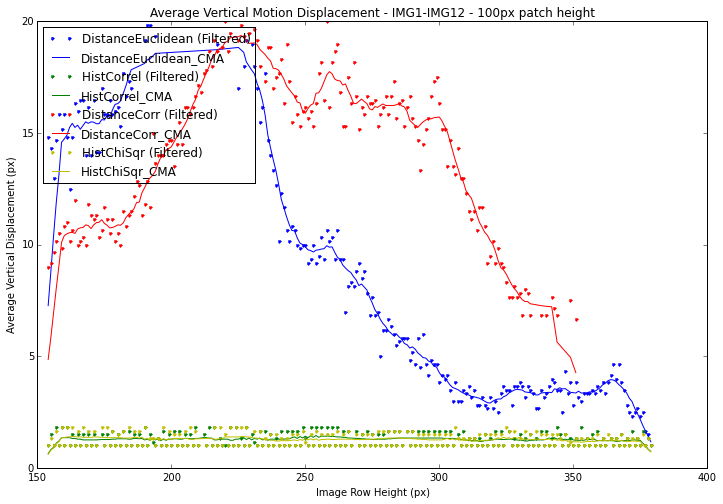

In [9]:
results = results_dict

final_results = {}

format_ids = ["b", "g", "r", "y"]

for image_pair in results:
    
    for method in results[image_pair][100]:
        
        if method not in final_results:
            final_results[method] = {}
        
        data = results[image_pair][100][method]
        
        if 'displacement' in final_results[method]:
            final_results[method]['displacement'].append([o.displacement for o in data])
        else:
            final_results[method]['displacement'] = [[o.displacement for o in data]]
            
        final_results[method]['row'] = [o.row for o in data]
        

for i, result in enumerate(final_results):
    
    final_results[result]['average'] = TSEDataUtils.calc_element_wise_average(final_results[result]['displacement'])
    
    final_results[result]['filtered'] = TSEDataUtils.filter_outliers_ab_dist_median(final_results[result]['average'])
    
    final_results[result]['filtered_row'] = np.array(final_results[result]['row'])[TSEDataUtils.filter_outliers_ab_dist_median_indices(final_results[result]['average'])]
    
    final_results[result]['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(final_results[result]['filtered']), 10)
    
    plt.plot(np.array(final_results[result]['filtered_row']), np.array(final_results[result]['filtered']), "{0}.".format(format_ids[i]), label="{0} (Filtered)".format(result))
    
    plt.plot(final_results[result]['filtered_row'][len(final_results[result]['filtered_row']) - len(final_results[result]['cma']):], final_results[result]['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))                                                                                         
          
plt.title('Average Vertical Motion Displacement - IMG1-IMG12 - 100px patch height')
plt.xlabel('Image Row Height (px)')
plt.ylabel('Average Vertical Displacement (px)')
plt.legend(loc='upper left')
plt.show()

### Test 7: IMG1 - IMG12 - 200px patch - *DistanceEuclidean, DistanceCorr, HistCorrel, HistChiSqr*

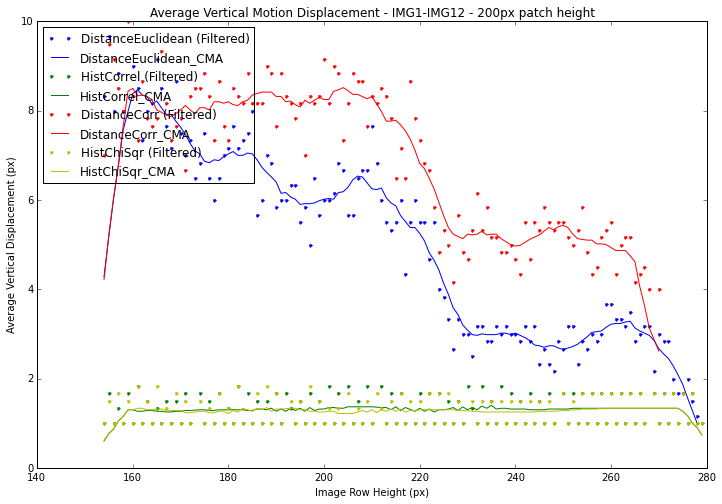

In [10]:
results = results_dict

final_results = {}

format_ids = ["b", "g", "r", "y"]

for image_pair in results:
    
    for method in results[image_pair][200]:
        
        if method not in final_results:
            final_results[method] = {}
        
        data = results[image_pair][200][method]
        
        if 'displacement' in final_results[method]:
            final_results[method]['displacement'].append([o.displacement for o in data])
        else:
            final_results[method]['displacement'] = [[o.displacement for o in data]]
            
        final_results[method]['row'] = [o.row for o in data]
        

for i, result in enumerate(final_results):
    
    final_results[result]['average'] = TSEDataUtils.calc_element_wise_average(final_results[result]['displacement'])
    
    final_results[result]['filtered'] = TSEDataUtils.filter_outliers_ab_dist_median(final_results[result]['average'])
    
    final_results[result]['filtered_row'] = np.array(final_results[result]['row'])[TSEDataUtils.filter_outliers_ab_dist_median_indices(final_results[result]['average'])]
    
    final_results[result]['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(final_results[result]['filtered']), 10)
    
    plt.plot(np.array(final_results[result]['filtered_row']), np.array(final_results[result]['filtered']), "{0}.".format(format_ids[i]), label="{0} (Filtered)".format(result))
    
    plt.plot(final_results[result]['filtered_row'][len(final_results[result]['filtered_row']) - len(final_results[result]['cma']):], final_results[result]['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))                                                                                         
          
plt.title('Average Vertical Motion Displacement - IMG1-IMG12 - 200px patch height')
plt.xlabel('Image Row Height (px)')
plt.ylabel('Average Vertical Displacement (px)')
plt.legend(loc='upper left')
plt.show()

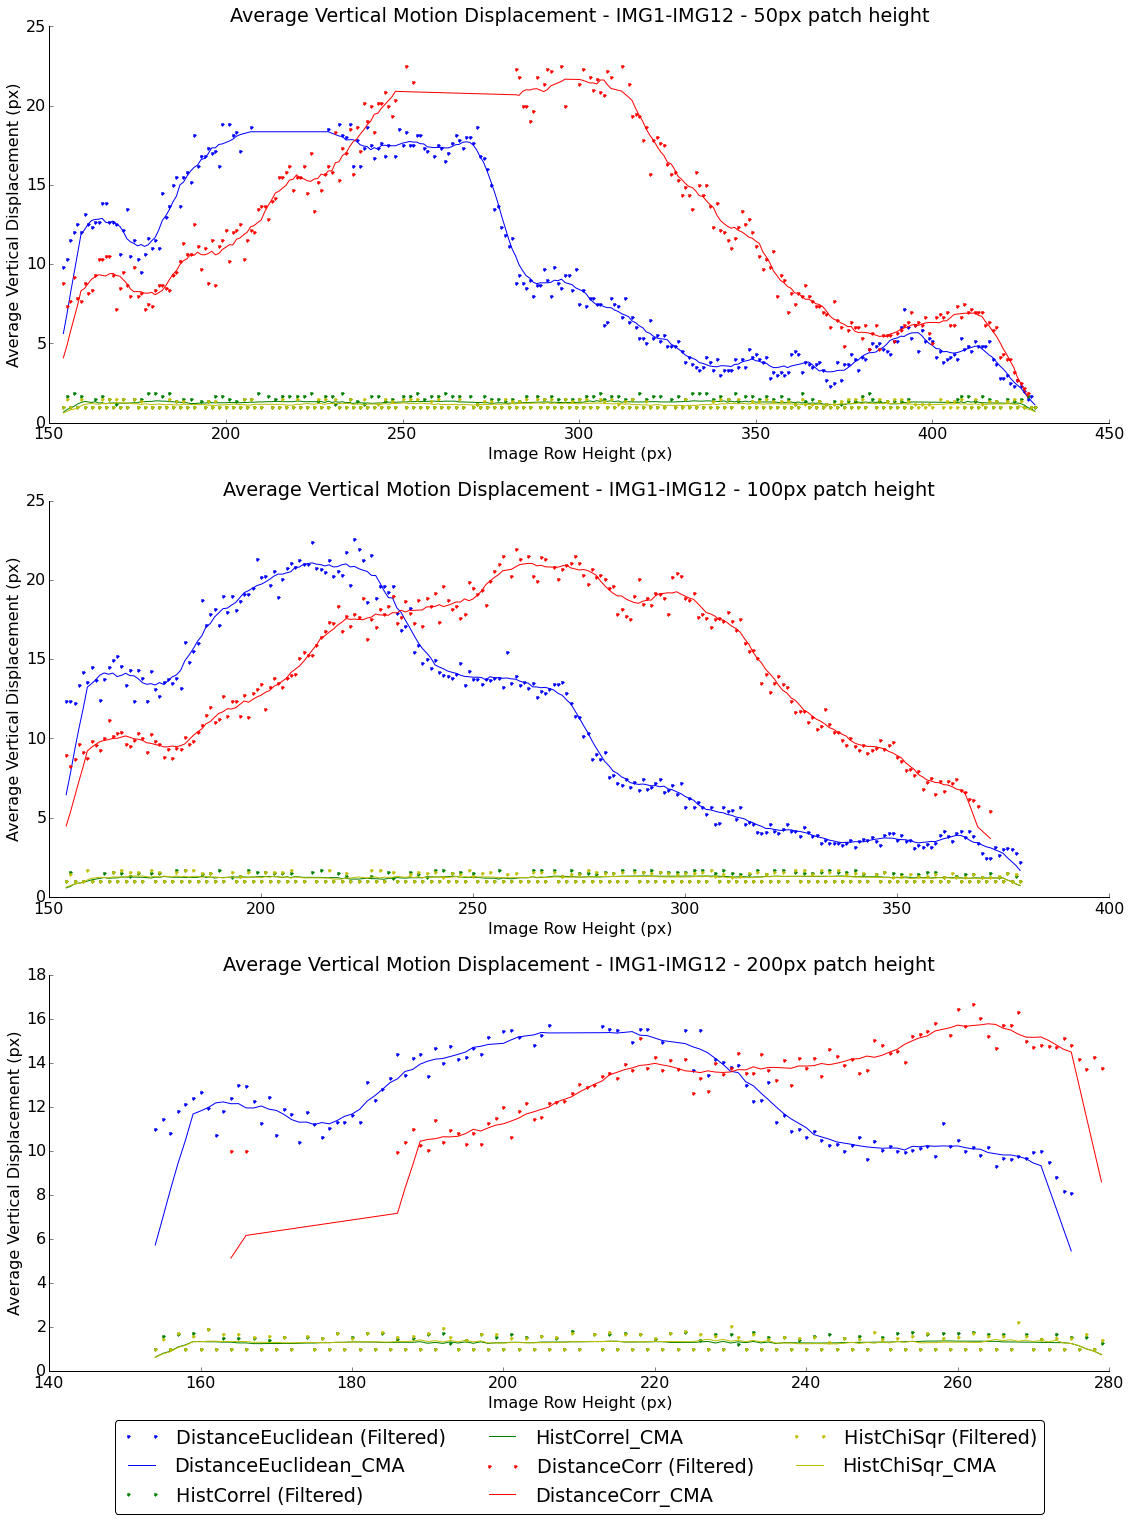

In [12]:
results = results_dict

final_results = {}

format_ids = ["b", "g", "r", "y"]

fig, ax = plt.subplots()

mpl.rcParams['figure.figsize'] = (16, 20)
mpl.rcParams.update({'font.size': 16})

for i, patch in enumerate([50, 100, 200]):
    
    ax = plt.subplot2grid((3,1), (i,0))

    for image_pair in results:

        for method in results[image_pair][patch]:

            if method not in final_results:
                final_results[method] = {}

            data = results[image_pair][patch][method]

            if 'displacement' in final_results[method]:
                final_results[method]['displacement'].append([o.displacement for o in data])
            else:
                final_results[method]['displacement'] = [[o.displacement for o in data]]

            final_results[method]['row'] = [o.row for o in data]


    for i, result in enumerate(final_results):

        final_results[result]['average'] = TSEDataUtils.calc_element_wise_average(final_results[result]['displacement'])

        final_results[result]['filtered'] = TSEDataUtils.filter_outliers_ab_dist_median(final_results[result]['average'])

        final_results[result]['filtered_row'] = np.array(final_results[result]['row'])[TSEDataUtils.filter_outliers_ab_dist_median_indices(final_results[result]['average'])]

        final_results[result]['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(final_results[result]['filtered']), 10)

        plt.plot(np.array(final_results[result]['filtered_row']), np.array(final_results[result]['filtered']), "{0}.".format(format_ids[i]), label="{0} (Filtered)".format(result))

        plt.plot(final_results[result]['filtered_row'][len(final_results[result]['filtered_row']) - len(final_results[result]['cma']):], final_results[result]['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))                                                                                         

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.title('Average Vertical Motion Displacement - IMG1-IMG12 - {0}px patch height'.format(patch))
    plt.xlabel('Image Row Height (px)')
    plt.ylabel('Average Vertical Displacement (px)')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, ncol=3)

fig.tight_layout()
plt.show()